<a href="https://colab.research.google.com/github/MrLuksR/Repartido-2/blob/master/Regresion_Lineal_Multiple_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df = df.rename(columns={
    'creatinine_phosphokinase' : 'crea_phos',
    'ejection_fraction' : 'ejec_fract',
    'high_blood_pressure' : 'h_blood_p',
    'serum_creatinine' : 'ser_creat'})
df.head()

,age,anaemia,crea_phos,diabetes,ejec_fract,h_blood_p,platelets,ser_creat,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


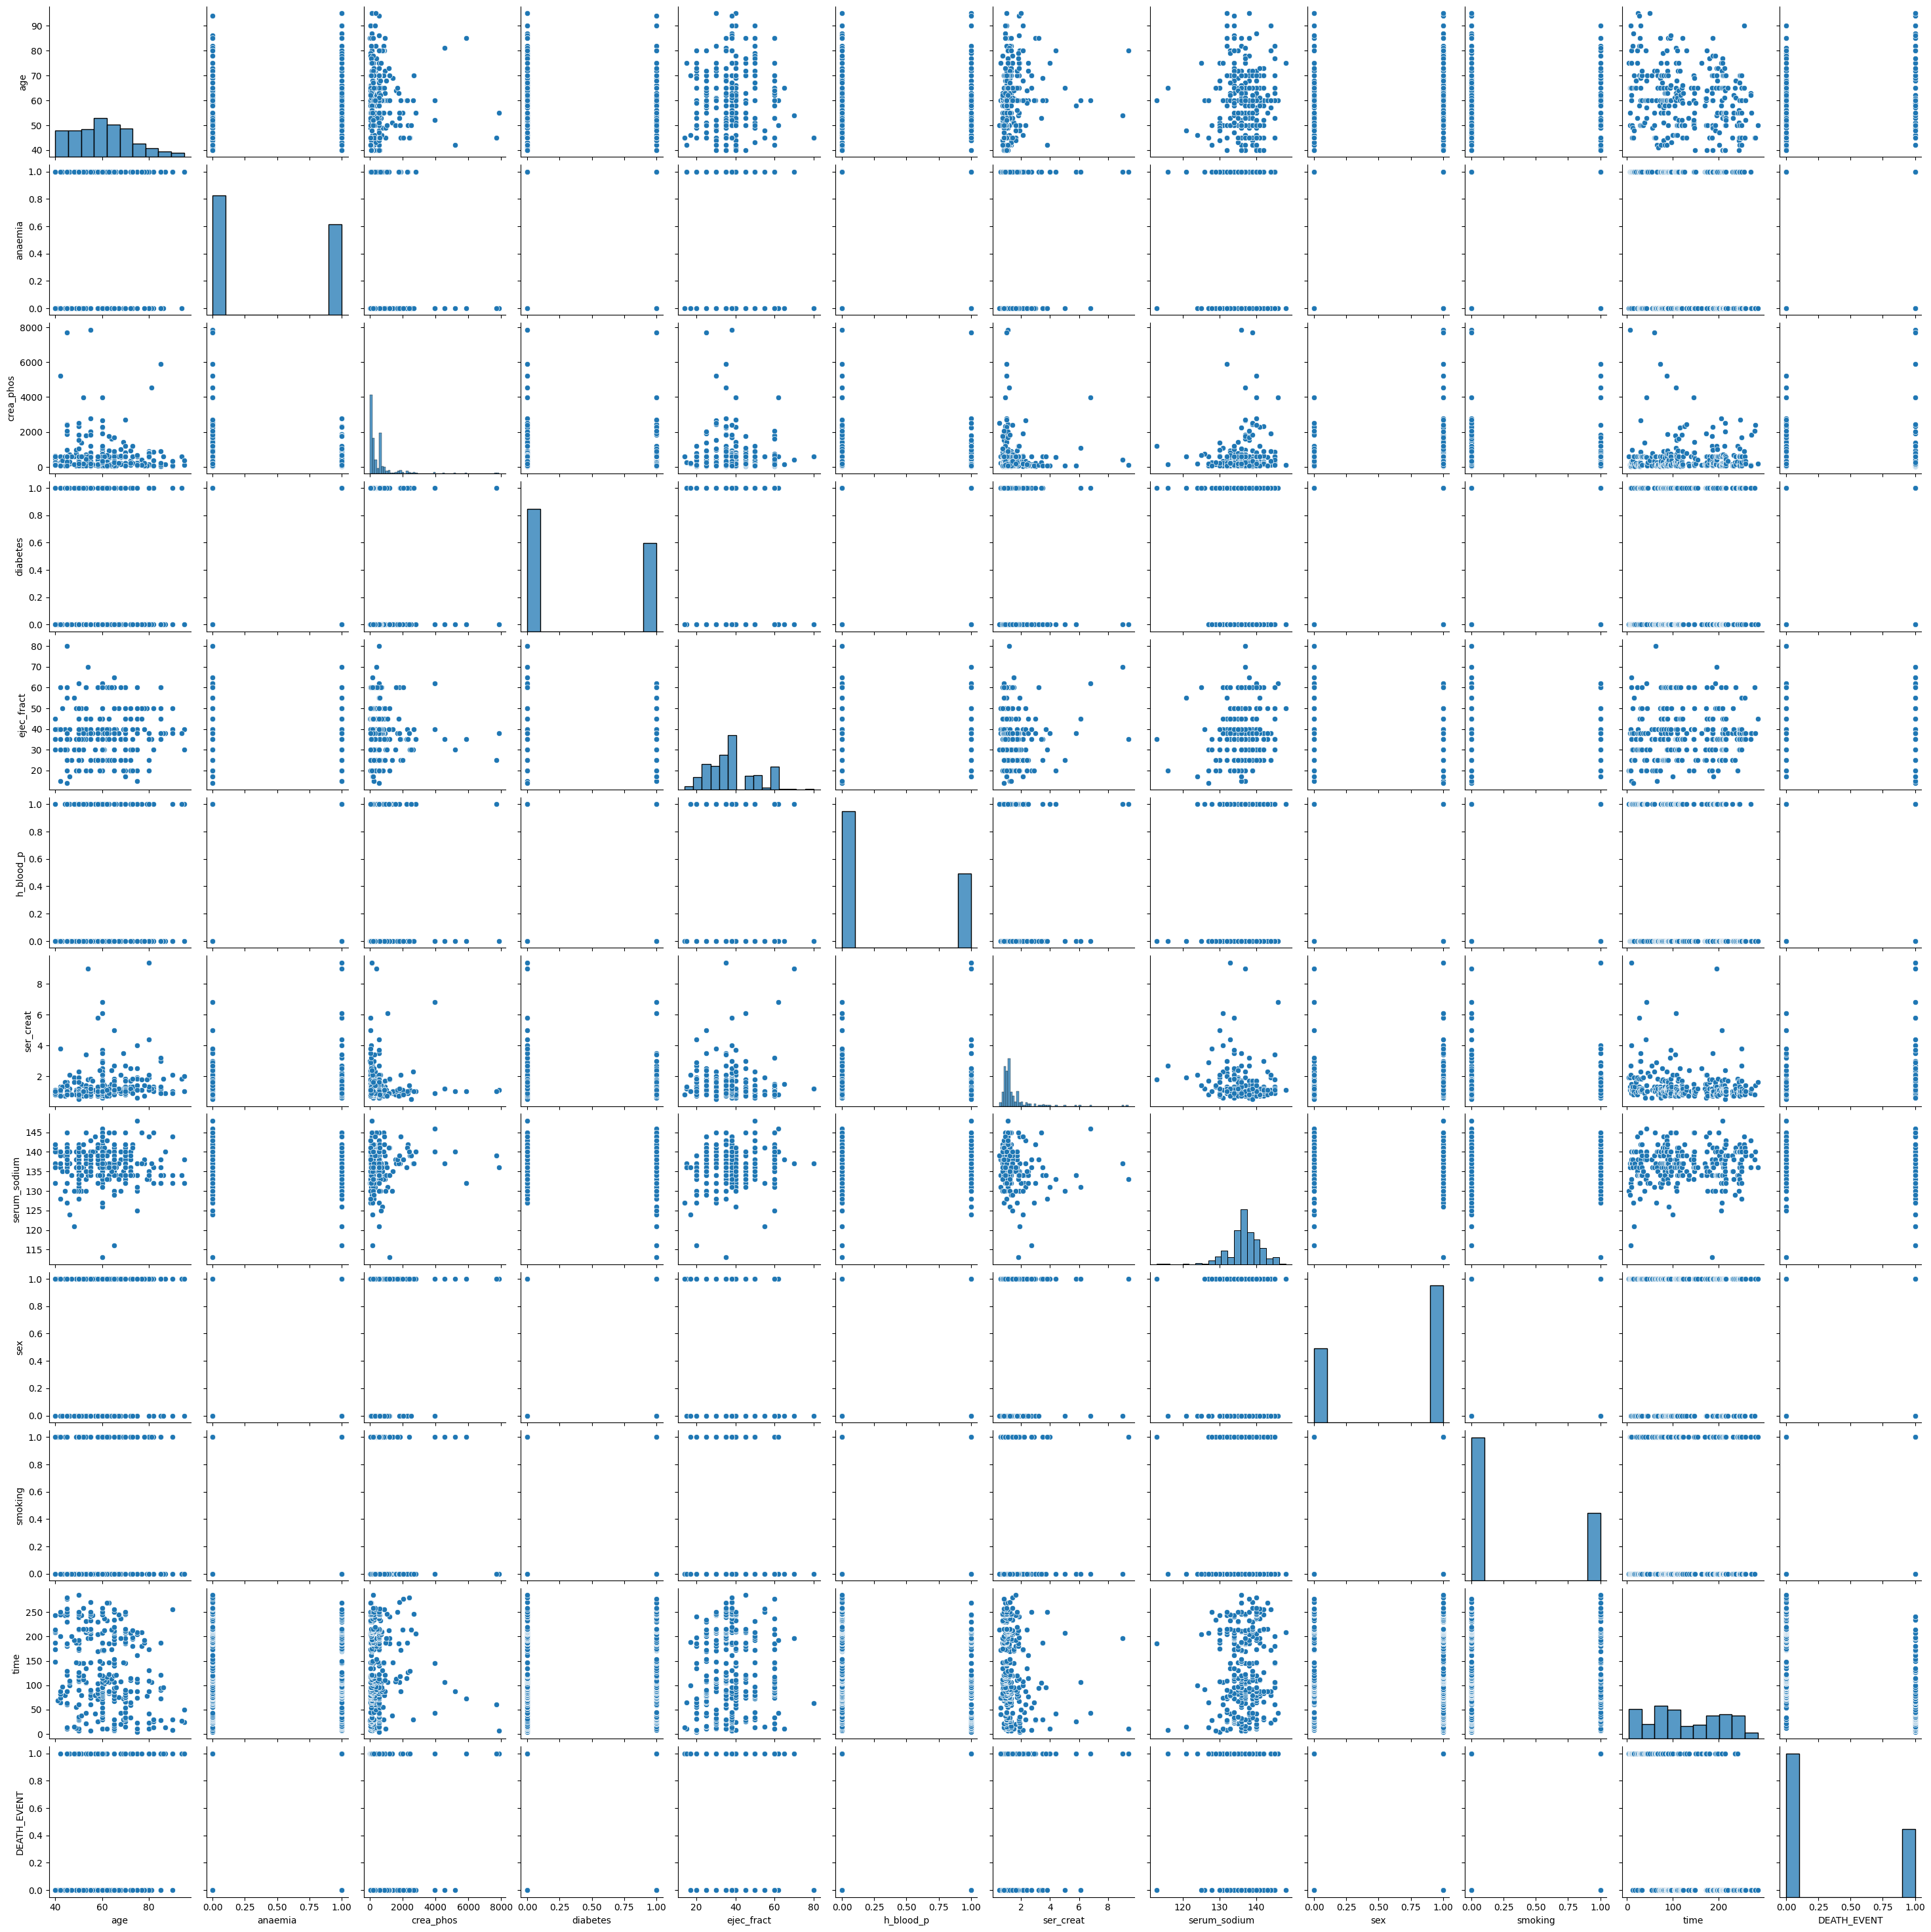

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['age', 'anaemia', 'crea_phos', 'diabetes', 'ejec_fract', 'h_blood_p', 'ser_creat', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
sns.pairplot(df[cols])
plt.show()

<Axes: >

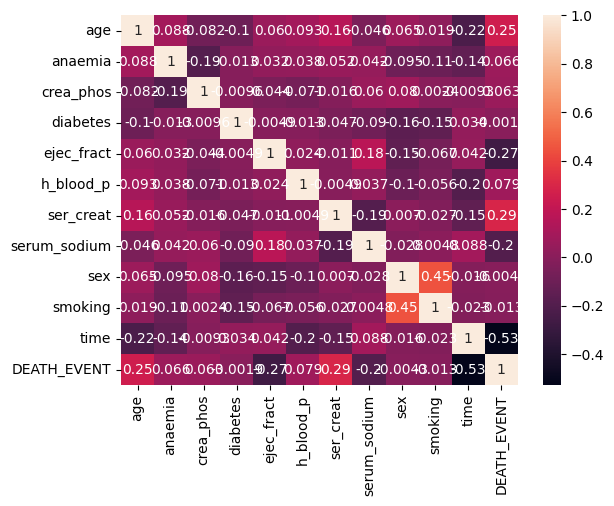

In [10]:
sns.heatmap(df[cols].corr(), annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
X = df[['age', 'time']].values
# Variables dependientes
Y = df['DEATH_EVENT'].values.reshape(-1,1)

sx = StandardScaler()
sy = StandardScaler()

X_s = sx.fit_transform(X)
Y_s = sy.fit_transform(Y)

lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [30]:
import numpy as np

edad = 60
tiempo = 0

# Entrada estandarizada
input_s = sx.transform(np.array([[edad, tiempo]]))
# Salida estandarizada
output_s = lr.predict(input_s)

# Salida des-estandarizada
output = sy.inverse_transform(output_s)

print("Probabilidad de Muerte: ", round(output[0][0] * 100, 2),"%")

Probabilidad de Muerte:  70.49 %
